# _Playing as the host nation in tournaments, boon or bane?_
## _- An Exploratoray Data Analysis Project_

When a team is playing in a tournament as the host nation, does the home crowd play as an advantage and propel them to perform even better or do they come under pressure of delivering in front of their home crowd and crumble? 

To understand this we will be analyzing data from four major tournaments :
- FIFA World Cup
- Copa América
- African Cup of Nations
- UEFA Euro


We get our [*dataset*](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017) from [*Kaggle*](https://www.kaggle.com/). This dataset contains data of international football matches that have been played since the year 1872 up till the present (2022).

We will be using the following libraries in Python for our analysis : 
- **Numpy** : it is used to perform a wide variety of mathematical operations on arrays
- **Pandas** : it is built off of Numpy and is used for data analysis and associated manipulation of tabular data in Dataframes
- **Matplotlib** : it is a comprehensive library for creating static, animated, and interactive visualisations in Python
- **Seaborn** : it is built on top of Matplotlib and is used for making statistical graphs in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the CSV files

results = pd.read_csv('results.csv')
shootouts = pd.read_csv('shootouts.csv')

In [3]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43416,2022-03-30,Mexico,El Salvador,2,0,FIFA World Cup qualification,Mexico City,Mexico,False
43417,2022-03-30,Costa Rica,United States,2,0,FIFA World Cup qualification,San José,Costa Rica,False
43418,2022-03-30,Panama,Canada,1,0,FIFA World Cup qualification,Panama City,Panama,False
43419,2022-03-30,Jamaica,Honduras,2,1,FIFA World Cup qualification,Kingston,Jamaica,False


In [4]:
shootouts

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia
...,...,...,...,...
452,2022-01-26,Mali,Equatorial Guinea,Equatorial Guinea
453,2022-02-03,Cameroon,Egypt,Egypt
454,2022-02-05,Cameroon,Burkina Faso,Cameroon
455,2022-02-06,Senegal,Egypt,Senegal


## _Data Preparation and Cleaning_

Adding a new column in the shootouts dataframe which will come in handy post-merging

In [5]:
shootouts['shootout'] = True

Merging both the dataframes to combine shooutout results

In [6]:
rs = pd.merge(results, shootouts, how = 'outer', on = ['date', 'home_team', 'away_team'])

In [7]:
rs

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,shootout
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,NaN,NaN
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,NaN,NaN
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
43418,2022-03-30,Panama,Canada,1.0,0.0,FIFA World Cup qualification,Panama City,Panama,False,NaN,NaN
43419,2022-03-30,Jamaica,Honduras,2.0,1.0,FIFA World Cup qualification,Kingston,Jamaica,False,NaN,NaN
43420,2022-03-30,Solomon Islands,New Zealand,0.0,5.0,FIFA World Cup qualification,Doha,Qatar,True,NaN,NaN
43421,2009-10-28,South Africa,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe,True


Dropping the last two rows as it has a lot of missing data and is irrelevant to our theory that we are testing

In [8]:
rs.drop([43421, 43422], inplace = True)
rs

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,shootout
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,NaN,NaN
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,NaN,NaN
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
43416,2022-03-30,Mexico,El Salvador,2.0,0.0,FIFA World Cup qualification,Mexico City,Mexico,False,NaN,NaN
43417,2022-03-30,Costa Rica,United States,2.0,0.0,FIFA World Cup qualification,San José,Costa Rica,False,NaN,NaN
43418,2022-03-30,Panama,Canada,1.0,0.0,FIFA World Cup qualification,Panama City,Panama,False,NaN,NaN
43419,2022-03-30,Jamaica,Honduras,2.0,1.0,FIFA World Cup qualification,Kingston,Jamaica,False,NaN,NaN


Renaming columns for consistency

In [9]:
rs.rename(columns = {'date':'Date',
                     'home_team':'Home Team',
                     'away_team':'Away Team',
                     'home_score':'Home Score',
                     'away_score':'Away Score',
                     'tournament':'Tournament',
                     'city':'City',
                     'country':'Country',
                     'neutral':'Neutral Venue',
                     'winner':'Winning Team',
                     'shootout':'Shootout'
                     }, inplace = True)

Changing date format from 'object' to 'datetime' and then adding an extra column 'Year' for more accurate analysis

In [10]:
# changing date format from 'object' to 'datetime'

rs['Date'] = pd.to_datetime(rs['Date'])

# adding a new column 'year' by splitting the 'date' column

rs['Year'] = pd.DatetimeIndex(rs['Date']).year

Creating a column that displays the outcome of the match

In [11]:
# winning team

rs.loc[rs['Home Score'] > rs['Away Score'], 'Winning Team'] = rs['Home Team']
rs.loc[rs['Home Score'] < rs['Away Score'], 'Winning Team'] = rs['Away Team']

# losing team

rs.loc[rs['Home Team']== rs['Winning Team'], 'Losing Team'] = rs['Away Team']
rs.loc[rs['Away Team'] == rs['Winning Team'], 'Losing Team'] = rs['Home Team']

Replacing NULL values wherever necessary

In [12]:
# cleaning NaN values

rs['Winning Team'].fillna('Draw', inplace = True)
rs['Shootout'].fillna(False, inplace = True)
rs['Losing Team'].fillna('Draw', inplace = True)

Correcting error(s) in the outcome of a game that was missing in the extracted data

In [13]:
rs.loc[rs.Date == '1976-03-14', 'Winning Team'] = 'Morocco'
rs.loc[rs.Date == '1976-03-14', 'Losing Team'] = 'Guinea'

Repositioning columns for better understanding

In [14]:
#repositioning columns for better understanding

year = rs.pop('Year')
rs.insert(0, 'Year', year)

shootout = rs.pop('Shootout')
rs.insert(6, 'Shootout', shootout)

In [15]:
rs

,Year,Date,Home Team,Away Team,Home Score,Away Score,Shootout,Tournament,City,Country,Neutral Venue,Winning Team,Losing Team
0,1872,1872-11-30,Scotland,England,0.0,0.0,False,Friendly,Glasgow,Scotland,False,Draw,Draw
1,1873,1873-03-08,England,Scotland,4.0,2.0,False,Friendly,London,England,False,England,Scotland
2,1874,1874-03-07,Scotland,England,2.0,1.0,False,Friendly,Glasgow,Scotland,False,Scotland,England
3,1875,1875-03-06,England,Scotland,2.0,2.0,False,Friendly,London,England,False,Draw,Draw
4,1876,1876-03-04,Scotland,England,3.0,0.0,False,Friendly,Glasgow,Scotland,False,Scotland,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43416,2022,2022-03-30,Mexico,El Salvador,2.0,0.0,False,FIFA World Cup qualification,Mexico City,Mexico,False,Mexico,El Salvador
43417,2022,2022-03-30,Costa Rica,United States,2.0,0.0,False,FIFA World Cup qualification,San José,Costa Rica,False,Costa Rica,United States
43418,2022,2022-03-30,Panama,Canada,1.0,0.0,False,FIFA World Cup qualification,Panama City,Panama,False,Panama,Canada
43419,2022,2022-03-30,Jamaica,Honduras,2.0,1.0,False,FIFA World Cup qualification,Kingston,Jamaica,False,Jamaica,Honduras


To put our theory to test we be will taking _four major tournaments_ into account :
- **FIFA World Cup**
- **Copa América**
- **African Cup of Nations**
- **UEFA Euro**

We now create individual dataframes that contain data for these tournaments alone.

In [16]:
#creating dataframes for major tournaments

world_cup = rs.loc[rs['Tournament'] == 'FIFA World Cup']
copa_america = rs.loc[rs['Tournament'] == 'Copa América']
afcon = rs.loc[rs['Tournament'] == 'African Cup of Nations']
euros = rs.loc[rs['Tournament'] == 'UEFA Euro']

## _Exploratory Analysis and  Visualization_

Now that we cleaned the data, let us visualize some trends in the data

**We use groupby to create new dataframes containing the sum of goals scored every year. We then visualize this by plotting a line graph.**

In [17]:
# grouping dataframes with respect to the year and goals scored

world_cup_goals = world_cup.groupby('Year')[['Home Score', 'Away Score']].sum()
copa_america_goals = copa_america.groupby('Year')[['Home Score', 'Away Score']].sum()
afcon_goals = afcon.groupby('Year')[['Home Score', 'Away Score']].sum()
euros_goals = euros.groupby('Year')[['Home Score', 'Away Score']].sum()

world_cup_goals['Goals Scored'] = world_cup_goals['Home Score'] + world_cup_goals['Away Score']
copa_america_goals['Goals Scored'] = copa_america_goals['Home Score'] + copa_america_goals['Away Score']
afcon_goals['Goals Scored'] = afcon_goals['Home Score'] + afcon_goals['Away Score']
euros_goals['Goals Scored'] = euros_goals['Home Score'] + euros_goals['Away Score']

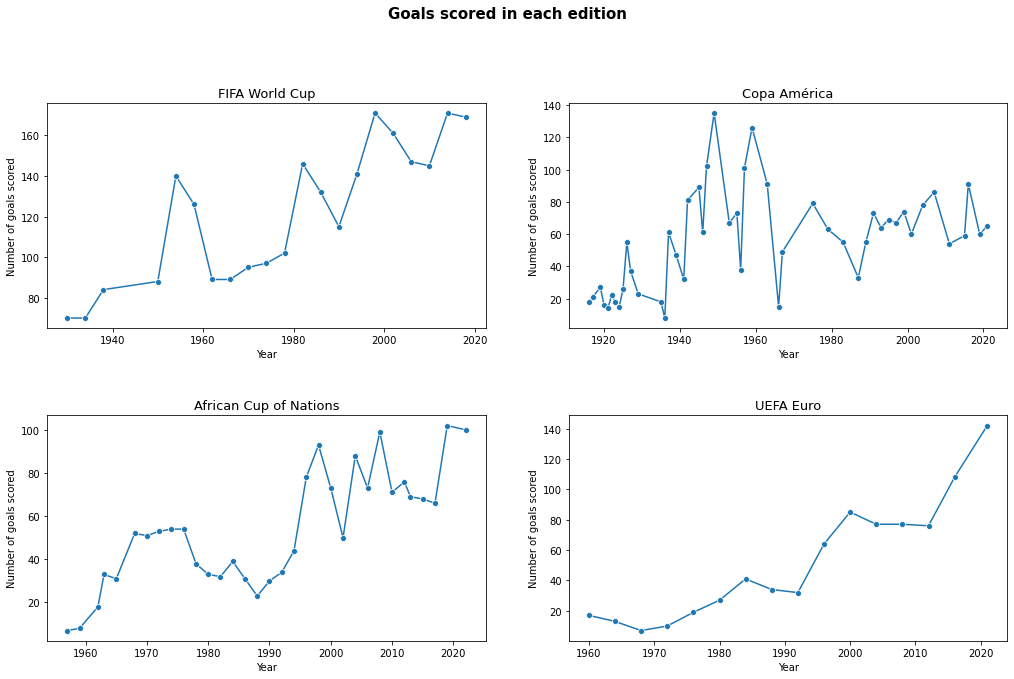

In [18]:
fig_goals, axs = plt.subplots(2,2, figsize=(15,10))

sns.lineplot(data = world_cup_goals, x = world_cup_goals.index, y = 'Goals Scored', ax = axs[0,0], marker='o')
sns.lineplot(data = copa_america_goals, x = copa_america_goals.index, y = 'Goals Scored', ax = axs[0,1], marker='o')
sns.lineplot(data = afcon_goals, x = afcon_goals.index, y = 'Goals Scored', ax = axs[1,0], marker='o')
sns.lineplot(data = euros_goals, x = euros_goals.index, y = 'Goals Scored', ax = axs[1,1], marker='o')

axs[0,0].set_xlabel('Year', fontsize = 10)
axs[0,1].set_xlabel('Year', fontsize = 10)
axs[1,0].set_xlabel('Year', fontsize = 10)
axs[1,1].set_xlabel('Year', fontsize = 10)

axs[0,0].set_ylabel('Number of goals scored', fontsize = 10)
axs[0,1].set_ylabel('Number of goals scored', fontsize = 10)
axs[1,0].set_ylabel('Number of goals scored', fontsize = 10)
axs[1,1].set_ylabel('Number of goals scored', fontsize = 10)

axs[0,0].set_title('FIFA World Cup', fontsize = 13)
axs[0,1].set_title('Copa América', fontsize = 13)
axs[1,0].set_title('African Cup of Nations', fontsize = 13)
axs[1,1].set_title('UEFA Euro', fontsize = 13)

plt.suptitle('Goals scored in each edition', fontweight ='bold', fontsize = 15)

fig_goals.tight_layout(pad = 4)

fig_goals.savefig('Goals scored in each edition.png')

**We create new dataframes that contain data of the finals of the respective tournaments.**

In [19]:
#creating dataframes for finals of the respective tournaments

world_cup_groupby = world_cup.groupby('Year')
world_cup_final = world_cup_groupby.last()

copa_america_groupby = copa_america.groupby('Year')
copa_america_final = copa_america_groupby.last()

afcon_groupby = afcon.groupby('Year')
afcon_final = afcon_groupby.last()

euros_groupby = euros.groupby('Year')
euros_final = euros_groupby.last()

In [20]:
# resolving certain faults in the Finals data

indexNames = copa_america_final[copa_america_final['Winning Team'] == 'Draw'].index
copa_america_final.drop(indexNames, inplace = True)

**We then create arrays which will be used to visualize bargraphs where we display all the champions of each tournament and the number times they have won the tournament.**

In [21]:
# creating arrays to identify the winners and how many times they have won

world_cup_champions = world_cup_final['Winning Team'].value_counts().sort_index()
copa_america_champions = copa_america_final['Winning Team'].value_counts().sort_index()
afcon_champions = afcon_final['Winning Team'].value_counts().sort_index()
euros_champions = euros_final['Winning Team'].value_counts().sort_index()


world_cup_champions_count = world_cup_champions.array
world_cup_champions_teamnames = world_cup_champions.index.array

copa_america_champions_count = copa_america_champions.array
copa_america_champions_teamnames = copa_america_champions.index.array

afcon_champions_count = afcon_champions.array
afcon_champions_teamnames = afcon_champions.index.array

euros_champions_count = euros_champions.array
euros_champions_teamnames = euros_champions.index.array

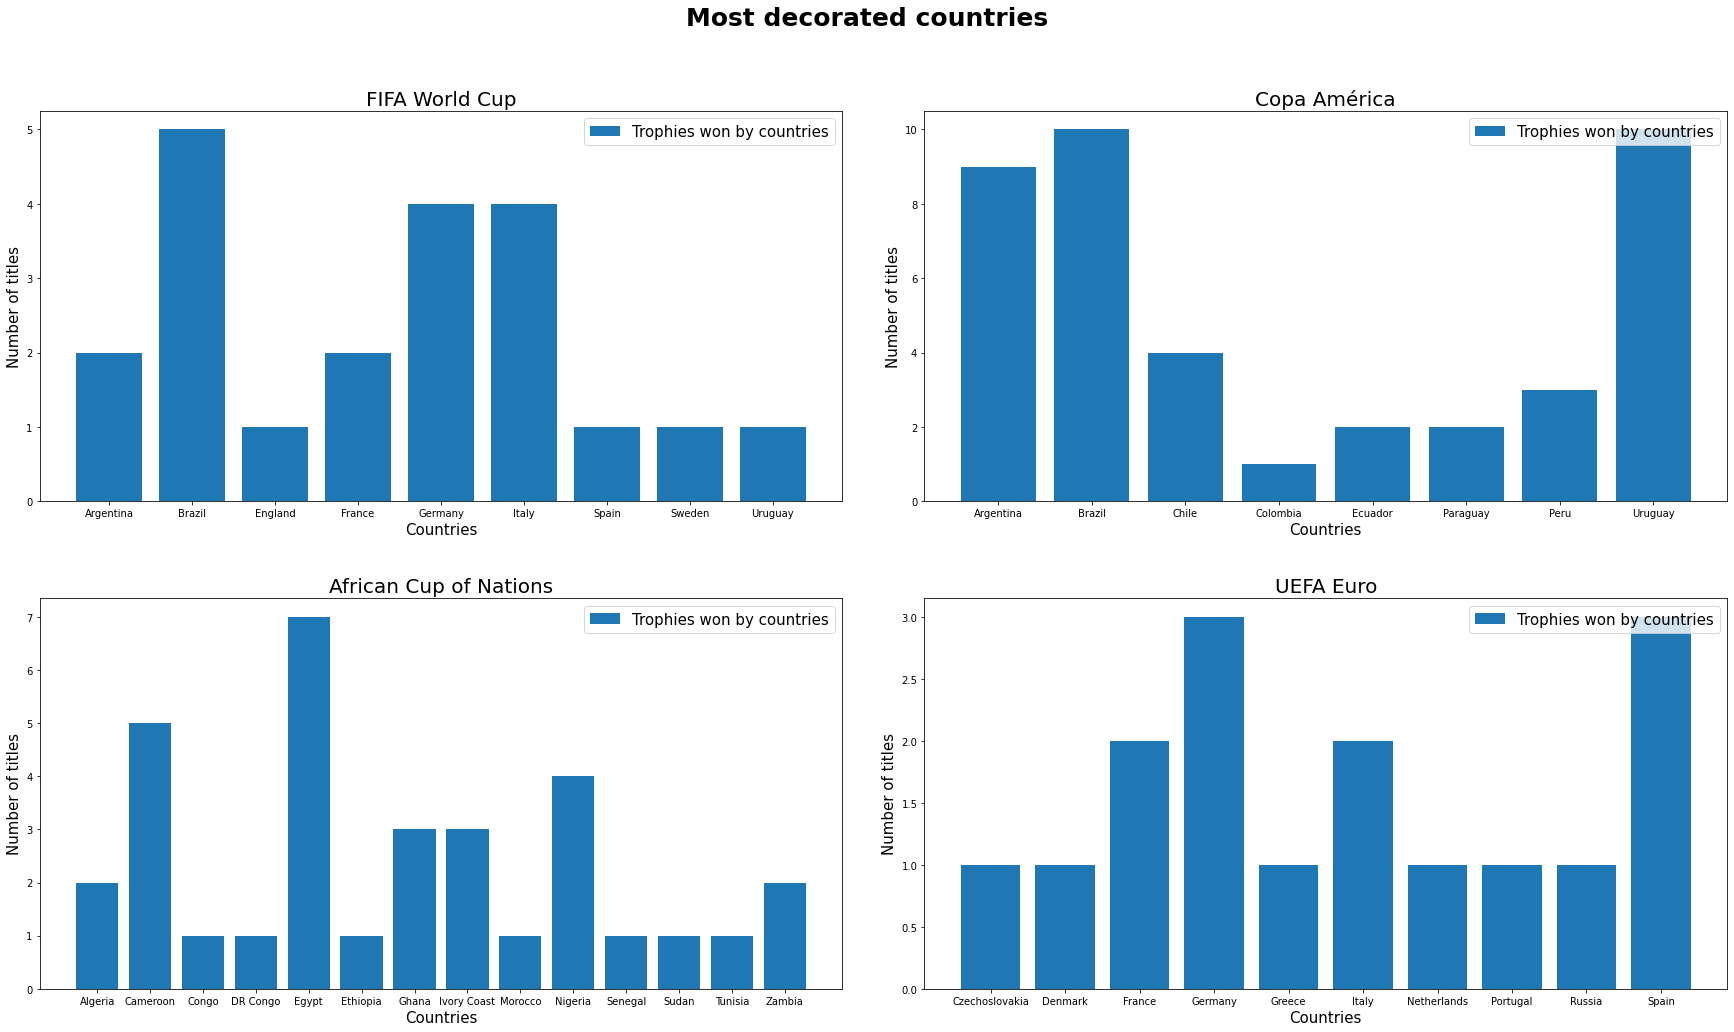

In [22]:
# plotting bar graphs to show the most successful countries in each tournament

fig_trophies, axs = plt.subplots(2,2, figsize=(25,15))

axs[0,0].bar(world_cup_champions_teamnames, world_cup_champions_count)
axs[0,1].bar(copa_america_champions_teamnames, copa_america_champions_count)
axs[1,0].bar(afcon_champions_teamnames, afcon_champions_count)
axs[1,1].bar(euros_champions_teamnames, euros_champions_count)

axs[0,0].legend(['Trophies won by countries'], fontsize = 15, loc = 'upper right')
axs[0,1].legend(['Trophies won by countries'], fontsize = 15, loc = 'upper right')
axs[1,0].legend(['Trophies won by countries'], fontsize = 15, loc = 'upper right')
axs[1,1].legend(['Trophies won by countries'], fontsize = 15, loc = 'upper right')

axs[0,0].set_xlabel('Countries', fontsize = 15)
axs[0,1].set_xlabel('Countries', fontsize = 15)
axs[1,0].set_xlabel('Countries', fontsize = 15)
axs[1,1].set_xlabel('Countries', fontsize = 15)

axs[0,0].set_ylabel('Number of titles', fontsize = 15)
axs[0,1].set_ylabel('Number of titles', fontsize = 15)
axs[1,0].set_ylabel('Number of titles', fontsize = 15)
axs[1,1].set_ylabel('Number of titles', fontsize = 15)

axs[0,0].set_title('FIFA World Cup', fontsize = 20)
axs[0,1].set_title('Copa América', fontsize = 20)
axs[1,0].set_title('African Cup of Nations', fontsize = 20)
axs[1,1].set_title('UEFA Euro', fontsize = 20)

plt.suptitle('Most decorated countries', fontweight ='bold', fontsize = 25)

fig_trophies.tight_layout(pad = 4)

fig_trophies.savefig('Most decorated countries.png')

In [23]:
# creating arrays to identify number of times a host as won a tournament 

world_cup_host_champions_count = [1,0,1,1,1,1,0,0,1]
copa_america_host_champions_count = [5,4,2,1,1,1,2,6]
afcon_host_champions_count = [1,0,0,0,2,1,1,0,0,1,0,1,1,0]
euros_host_champions_count = [0,0,1,0,0,1,0,0,0,1]

**We now plot another set of bargraphs but with a slight twist. Here, we will be visualizing how many of the champions were hosts at the time.**

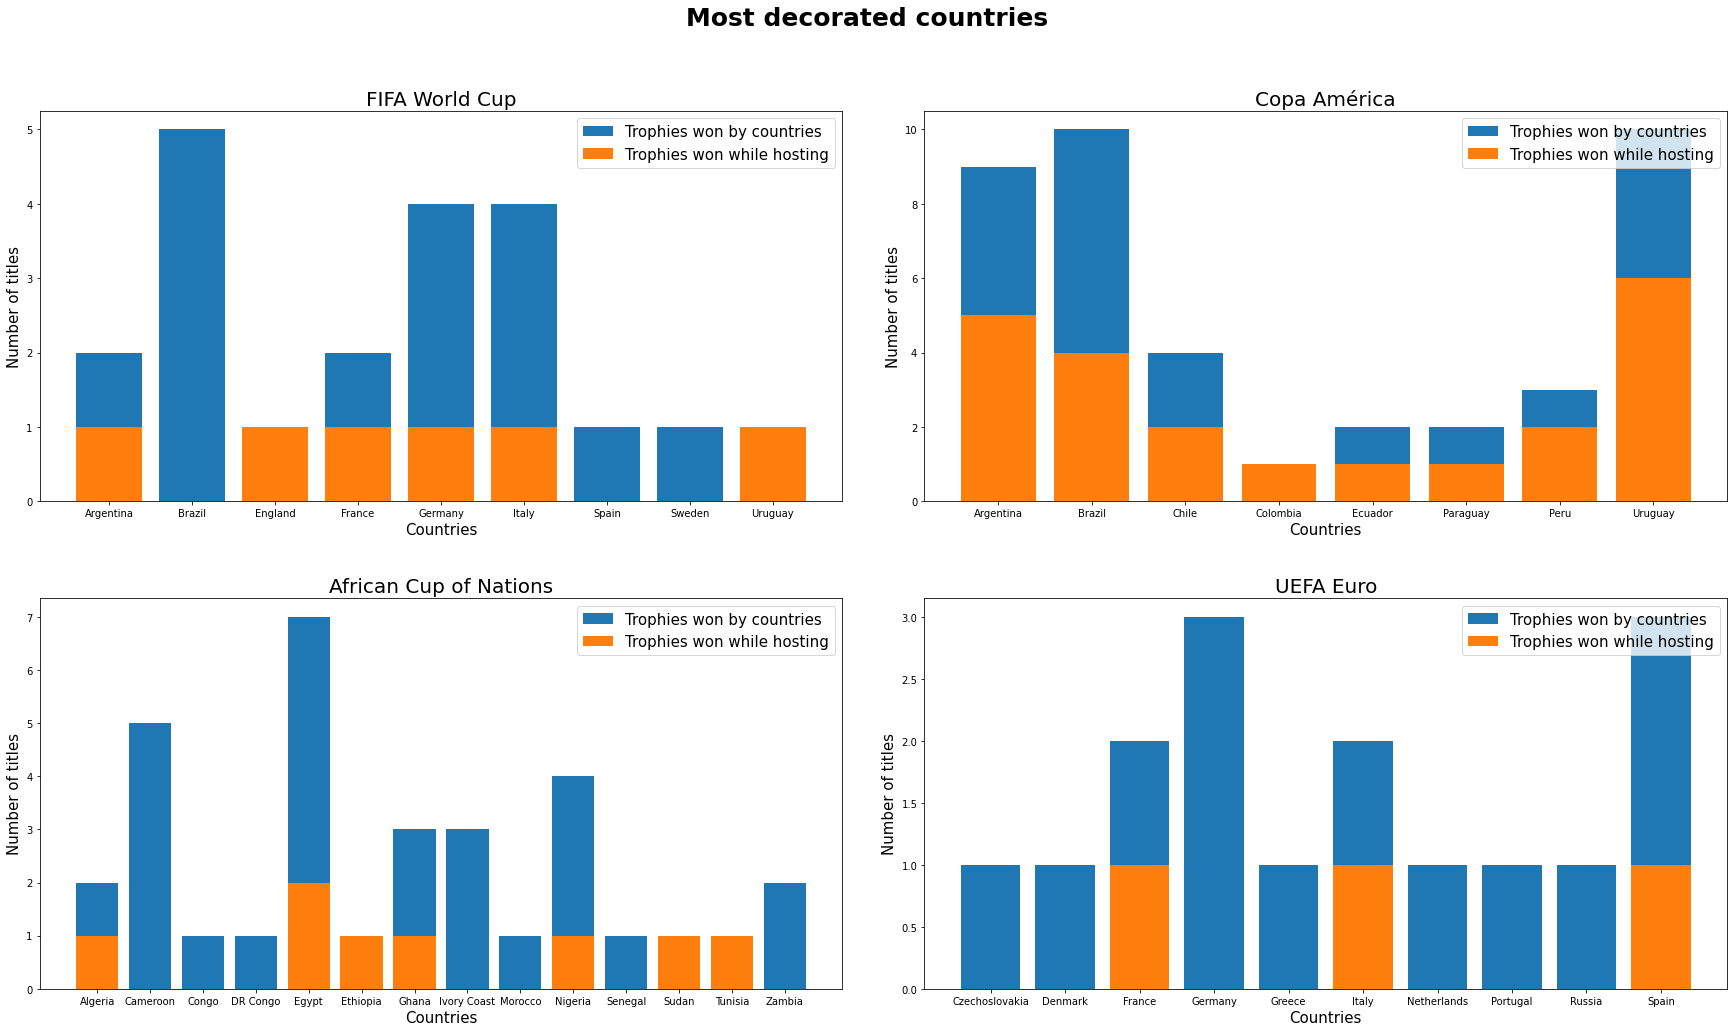

In [24]:
# plotting bar graphs to show the most successful home teams in tournaments

fig_host_trophies, axs = plt.subplots(2,2, figsize=(25,15))

axs[0,0].bar(world_cup_champions_teamnames, world_cup_champions_count)
axs[0,0].bar(world_cup_champions_teamnames, world_cup_host_champions_count)
axs[0,1].bar(copa_america_champions_teamnames, copa_america_champions_count)
axs[0,1].bar(copa_america_champions_teamnames, copa_america_host_champions_count)
axs[1,0].bar(afcon_champions_teamnames, afcon_champions_count)
axs[1,0].bar(afcon_champions_teamnames, afcon_host_champions_count)
axs[1,1].bar(euros_champions_teamnames, euros_champions_count)
axs[1,1].bar(euros_champions_teamnames, euros_host_champions_count)

axs[0,0].legend(['Trophies won by countries', 'Trophies won while hosting'], fontsize = 15, loc = 'upper right')
axs[0,1].legend(['Trophies won by countries', 'Trophies won while hosting'], fontsize = 15, loc = 'upper right')
axs[1,0].legend(['Trophies won by countries', 'Trophies won while hosting'], fontsize = 15, loc = 'upper right')
axs[1,1].legend(['Trophies won by countries', 'Trophies won while hosting'], fontsize = 15, loc = 'upper right')

axs[0,0].set_xlabel('Countries', fontsize = 15)
axs[0,1].set_xlabel('Countries', fontsize = 15)
axs[1,0].set_xlabel('Countries', fontsize = 15)
axs[1,1].set_xlabel('Countries', fontsize = 15)

axs[0,0].set_ylabel('Number of titles', fontsize = 15)
axs[0,1].set_ylabel('Number of titles', fontsize = 15)
axs[1,0].set_ylabel('Number of titles', fontsize = 15)
axs[1,1].set_ylabel('Number of titles', fontsize = 15)

axs[0,0].set_title('FIFA World Cup', fontsize = 20)
axs[0,1].set_title('Copa América', fontsize = 20)
axs[1,0].set_title('African Cup of Nations', fontsize = 20)
axs[1,1].set_title('UEFA Euro', fontsize = 20)

plt.suptitle('Most decorated countries', fontweight ='bold', fontsize = 25)

fig_host_trophies.tight_layout(pad = 4)

fig_host_trophies.savefig('Most successful host countries.png')

**We now will plot a piechart to visualize the difference in success between host team champions and neutral champions.**

In [25]:
# preparing necessary elements to draw a piechart

world_cup_neutral_champions_count = world_cup_champions_count - world_cup_host_champions_count
copa_america_neutral_champions_count =copa_america_champions_count - copa_america_host_champions_count
afcon_neutral_champions_count = afcon_champions_count - afcon_host_champions_count
euros_neutral_champions_count = euros_champions_count - euros_host_champions_count

world_cup_champions_arr = [sum(world_cup_neutral_champions_count), sum(world_cup_host_champions_count)]
copa_america_champions_arr = [sum(copa_america_neutral_champions_count), sum(copa_america_host_champions_count)]
afcon_champions_arr = [sum(afcon_neutral_champions_count), sum(afcon_host_champions_count)]
euros_champions_arr = [sum(euros_neutral_champions_count), sum(euros_host_champions_count)]

wp = {'edgecolor': 'black', 'linewidth': 2, 'antialiased': True}

tp = {'fontsize' : 15}

ex = (0.1, 0.0)

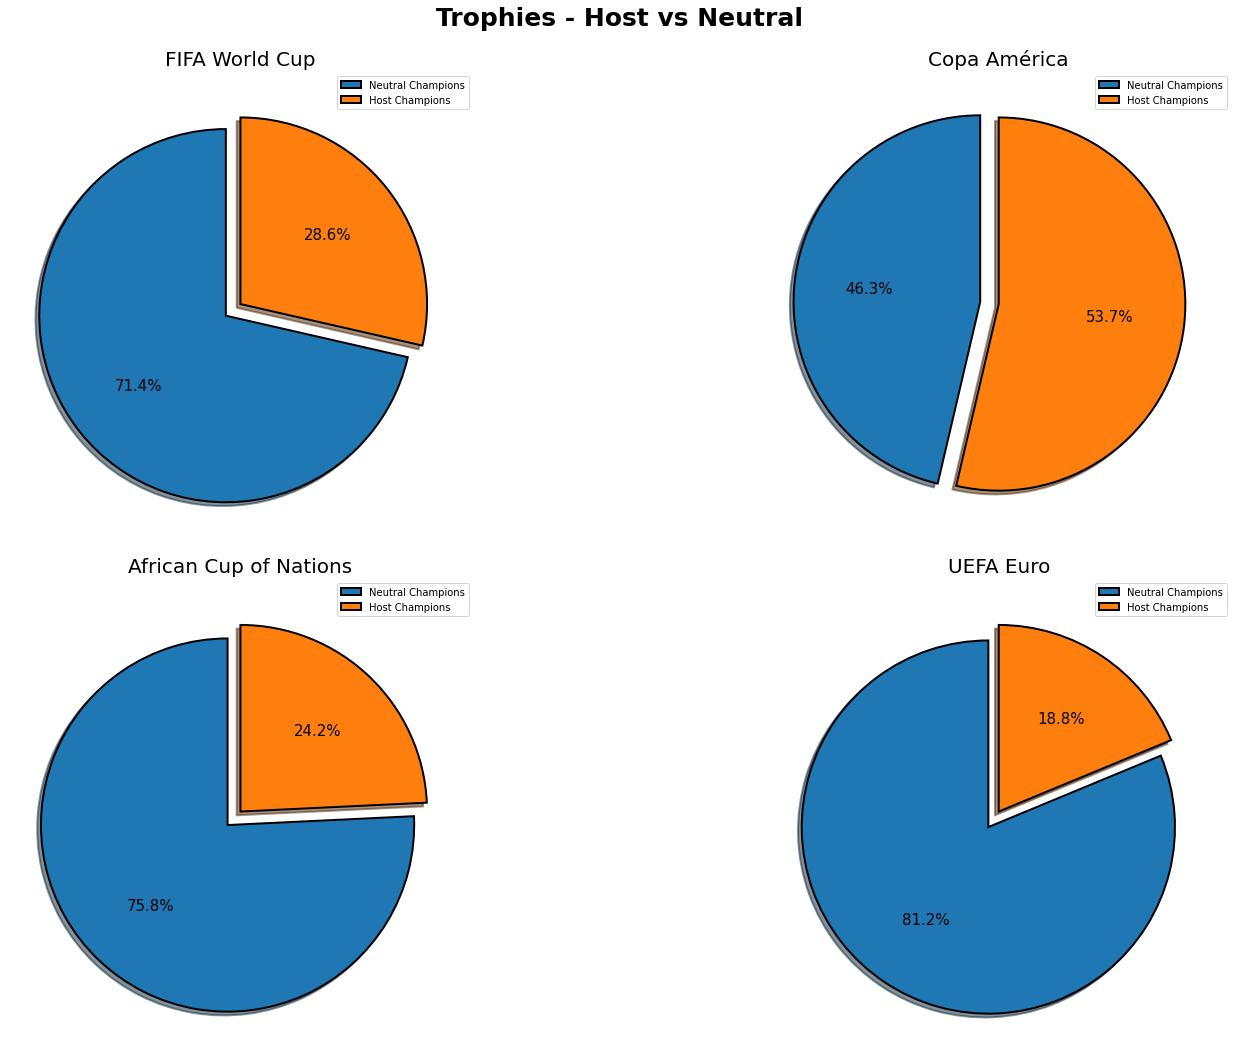

In [26]:
# plotting pie charts to show the difference in success percentage between host countries and neutral countries

fig_hostvsneutral_trophies, axs = plt.subplots(2,2, figsize=(25,15))

axs[0,0].pie(world_cup_champions_arr, autopct='%1.1f%%', startangle = 90, shadow = True, wedgeprops = wp, textprops = tp, explode = ex)
axs[0,1].pie(copa_america_champions_arr, autopct='%1.1f%%', startangle = 90, shadow = True, wedgeprops = wp, textprops = tp, explode = ex)
axs[1,0].pie(afcon_champions_arr, autopct='%1.1f%%', startangle = 90, shadow = True, wedgeprops = wp, textprops = tp, explode = ex)
axs[1,1].pie(euros_champions_arr, autopct='%1.1f%%', startangle = 90, shadow = True, wedgeprops = wp, textprops = tp, explode = ex)

axs[0,0].set_title('FIFA World Cup', fontsize = 20)
axs[0,1].set_title('Copa América', fontsize = 20)
axs[1,0].set_title('African Cup of Nations', fontsize = 20)
axs[1,1].set_title('UEFA Euro', fontsize = 20)

axs[0,0].legend(['Neutral Champions', 'Host Champions'])
axs[0,1].legend(['Neutral Champions', 'Host Champions'])
axs[1,0].legend(['Neutral Champions', 'Host Champions'])
axs[1,1].legend(['Neutral Champions', 'Host Champions'])

plt.suptitle('Trophies - Host vs Neutral', fontweight ='bold', fontsize = 25)

fig_hostvsneutral_trophies.tight_layout(pad = 2)

fig_hostvsneutral_trophies.savefig('Host vs Neutral success comparison.png')

## _Some interesting facts we discovered through our dataset_

- **Which team has scored the most number of goals?**

In [31]:
home_team = rs.groupby('Home Team')[['Home Score', 'Away Score']].sum()
away_team = rs.groupby('Away Team')[['Home Score', 'Away Score']].sum()

home_team.drop(['Canary Islands', 'Găgăuzia', 'Madrid', 'Niue', 'Republic of St. Pauli', 'Silesia'], inplace = True)
away_team.drop(['Asturias', 'Brunei Darussalam', 'Crimea', 'Two Sicilies'], inplace = True)

home_team.reset_index(inplace = True)
away_team.reset_index(inplace = True)

total_goals_scored = home_team['Home Score'] + away_team['Away Score']
total_goals_conceded = home_team['Away Score'] + away_team['Home Score']

countries = pd.DataFrame({
    'Team' : home_team['Home Team'],
    'Goals Scored' : total_goals_scored,
    'Goals Conceded' :total_goals_conceded
})
countries.columns = ['Team', 'Goals Scored', 'Goals Conceded']

In [32]:
total_goals = countries['Goals Scored'].idxmax()
countries.iloc[total_goals].to_frame()

,79
Team,England
Goals Scored,2278.0
Goals Conceded,1004.0


- **What is the highest scoring match in the history of football?**

In [33]:
goals_scored = rs['Home Score'] + rs['Away Score']
rs.iloc[goals_scored.idxmax()].to_frame()

,23965
Year,2001
Date,2001-04-11 00:00:00
Home Team,Australia
Away Team,American Samoa
Home Score,31.0
Away Score,0.0
Shootout,False
Tournament,FIFA World Cup qualification
City,Coffs Harbour
Country,Australia


- **Which team has scored the most number of goals in a single match?**

In [34]:
homescore_max = rs['Home Score'].max()
awayscore_max = rs['Away Score'].max()

if homescore_max > awayscore_max :
    score_max_index = rs['Home Score'].idxmax()
else :
    score_max_index = rs['Away Score'].idxmax()
    
rs.iloc[score_max_index].to_frame()

,23965
Year,2001
Date,2001-04-11 00:00:00
Home Team,Australia
Away Team,American Samoa
Home Score,31.0
Away Score,0.0
Shootout,False
Tournament,FIFA World Cup qualification
City,Coffs Harbour
Country,Australia


- **Which country has won the most number of world cups?**

Text(0.5, 1.0, 'FIFA World Cup')

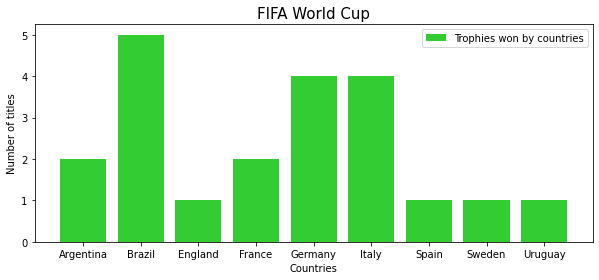

In [35]:
fig, ax = plt.subplots(figsize = (10,4))

ax.bar(world_cup_champions_teamnames, world_cup_champions_count, color = '#33cc33')

ax.legend(['Trophies won by countries'], fontsize = 10, loc = 'upper right')

ax.set_xlabel('Countries', fontsize = 10)
ax.set_ylabel('Number of titles', fontsize = 10)

ax.set_title('FIFA World Cup', fontsize = 15)

- **What is _England's_ H2H record?**

In [36]:
h2h = pd.DataFrame(columns = ['team', 'opponent', 'games_played', 'wins', 'draws', 'losses', 'goals_scored', 'goals_conceded'])

team = 'England'

for index, row in rs.iterrows():
    if row['Home Team'] == team:
        opponent = row['Away Team']
        if row['Home Score'] > row['Away Score']:
            win = 1
            draw = 0
            loss = 0
        elif row['Home Score'] < row['Away Score']:
            win = 0
            draw = 0
            loss = 1
        else:
            win = 0
            draw = 1
            loss = 0
        goals_scored = row['Home Score']
        goals_conceded = row['Away Score']
    else:
        opponent = row['Home Team']
        if row['Home Score'] > row['Away Score']:
            win = 0
            draw = 0
            loss = 1
        elif row['Home Score'] < row['Away Score']:
            win = 1
            draw = 0
            loss = 0
        else:
            win = 0
            draw = 1
            loss = 0
        goals_scored = row['Away Score']
        goals_conceded = row['Home Score']

    games_played = 1



    if opponent not in h2h['opponent'].unique():
        match = pd.DataFrame({'team': team,
                              'opponent': opponent,
                              'games_played': games_played,
                              'wins': win,
                              'draws': draw,
                              'losses': loss,
                              'goals_scored': goals_scored,
                              'goals_conceded': goals_conceded},
                             index = [0])
        h2h = pd.concat([h2h, match], ignore_index = True)
    else:
        h2h.loc[h2h['opponent'] == opponent, 'games_played'] += games_played
        h2h.loc[h2h['opponent'] == opponent, 'wins'] += win
        h2h.loc[h2h['opponent'] == opponent, 'draws'] += draw
        h2h.loc[h2h['opponent'] == opponent, 'losses'] += loss
        h2h.loc[h2h['opponent'] == opponent, 'goals_scored'] += goals_scored
        h2h.loc[h2h['opponent'] == opponent, 'goals_conceded'] += goals_conceded

In [37]:
h2h

,team,opponent,games_played,wins,draws,losses,goals_scored,goals_conceded
0,England,Scotland,451,115,97,239,515.0,841.0
1,England,Wales,389,156,94,139,592.0,534.0
2,England,Northern Ireland,372,184,78,110,712.0,441.0
3,England,United States,446,107,97,242,451.0,765.0
4,England,Uruguay,363,64,99,200,337.0,642.0
...,...,...,...,...,...,...,...,...
300,England,Cascadia,2,0,0,2,3.0,10.0
301,England,Kabylia,1,1,0,0,2.0,0.0
302,England,Parishes of Jersey,2,0,0,2,3.0,11.0
303,England,Chameria,1,0,0,1,0.0,4.0


## _Inferences_

To test our theory, first, we will look at a comparison of all the teams that have won the blowe mentioned tournaments:
- **FIFA World Cup**
- **Copa América**
- **African Cup of Nations**
- **UEFA Euro**

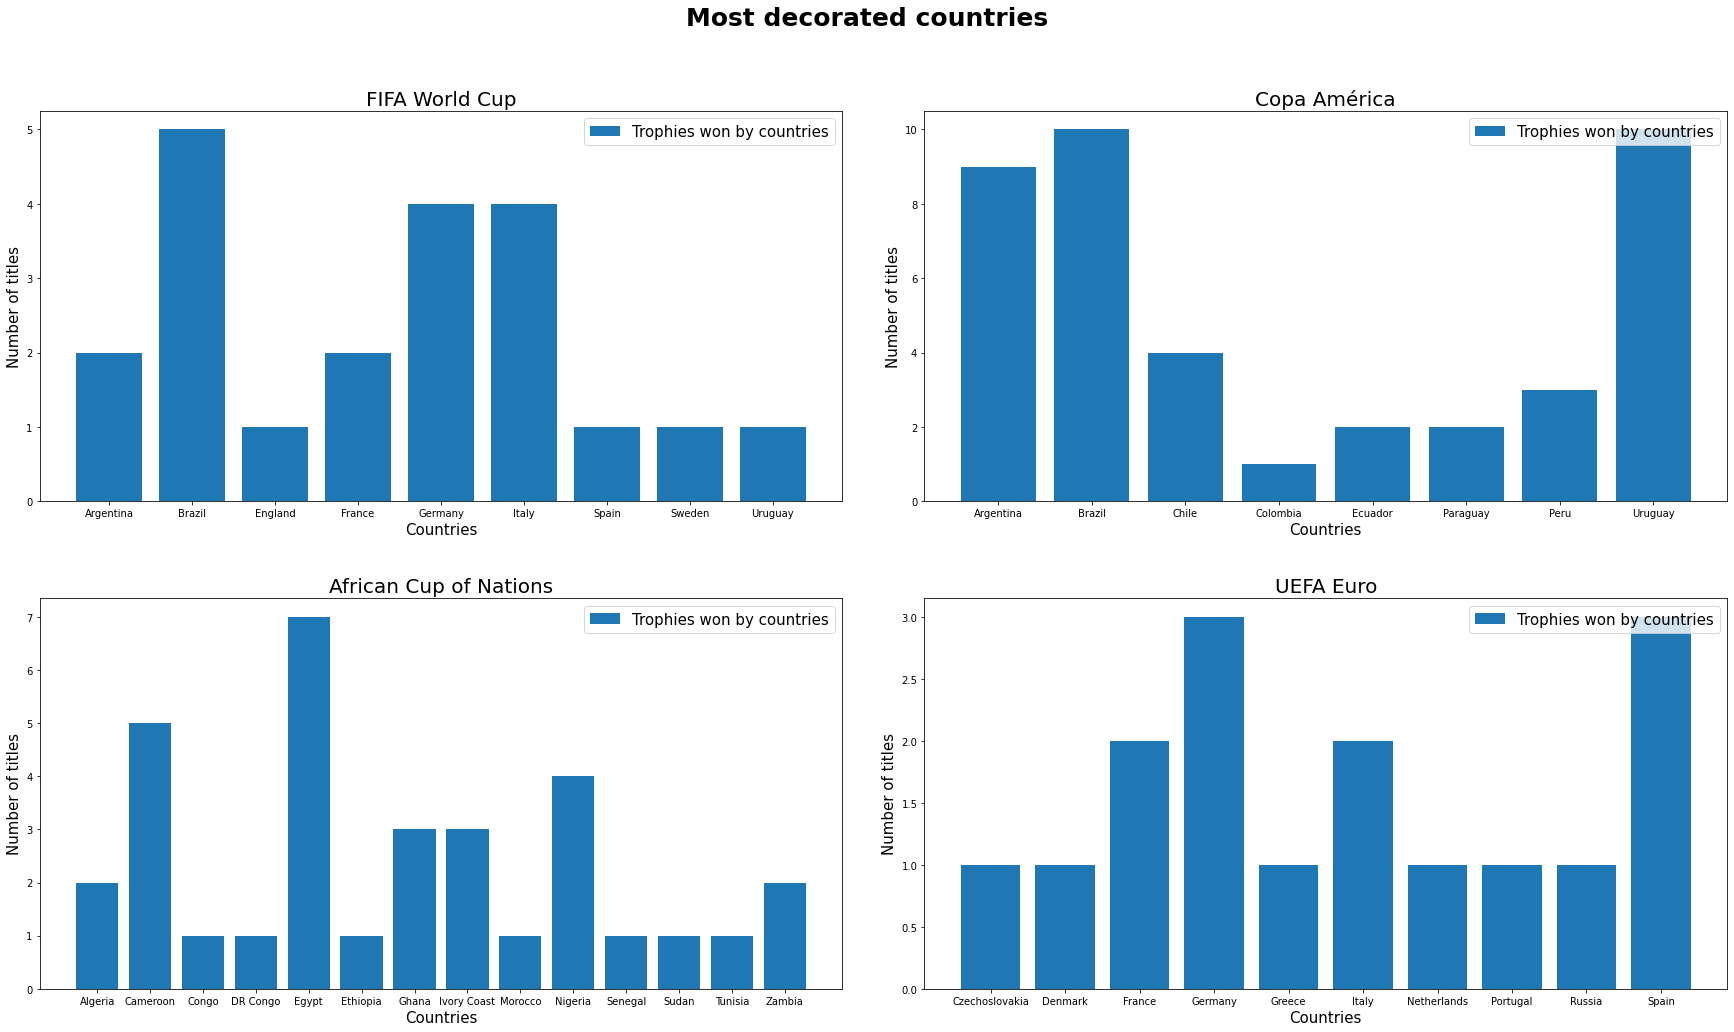

In [27]:
fig_trophies

**Brazil**, **Germany** and **Italy** have dominated both the International and the Continental tournaments, whilst countries such as **Egypt**, **Cameroon**, **Ghana**, **Ivory Coast**, **Nigeria**, **Spain**, **Argentina** and **Uruguay** have enjoyed quite a lot of Continental success.

Now let us take it one step further and see how many of these victors were hosts.

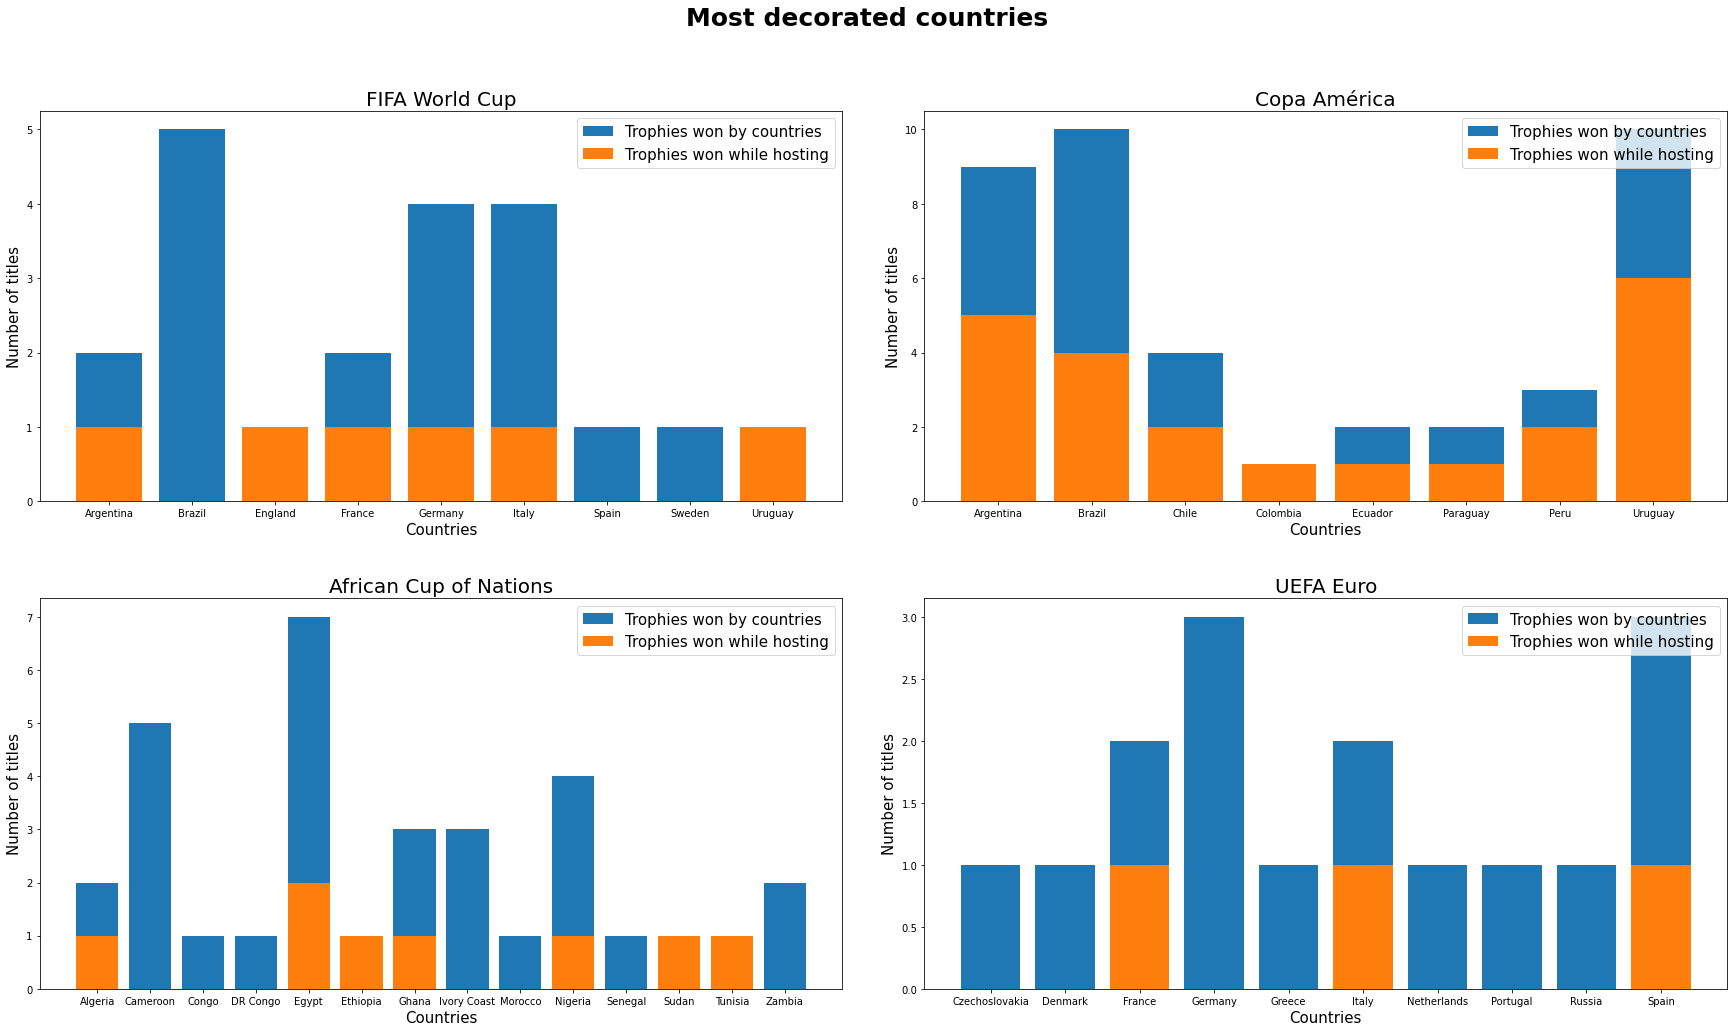

In [28]:
fig_host_trophies

There have been a fair few victors who were hosts as well but there seem to be quite a lot that weren't necessaily hosting tournaments which they won, with _Copa América_ being an exception.

Let's get a more specific visualisation as to how often do we see _Host Nations_ come out on top.

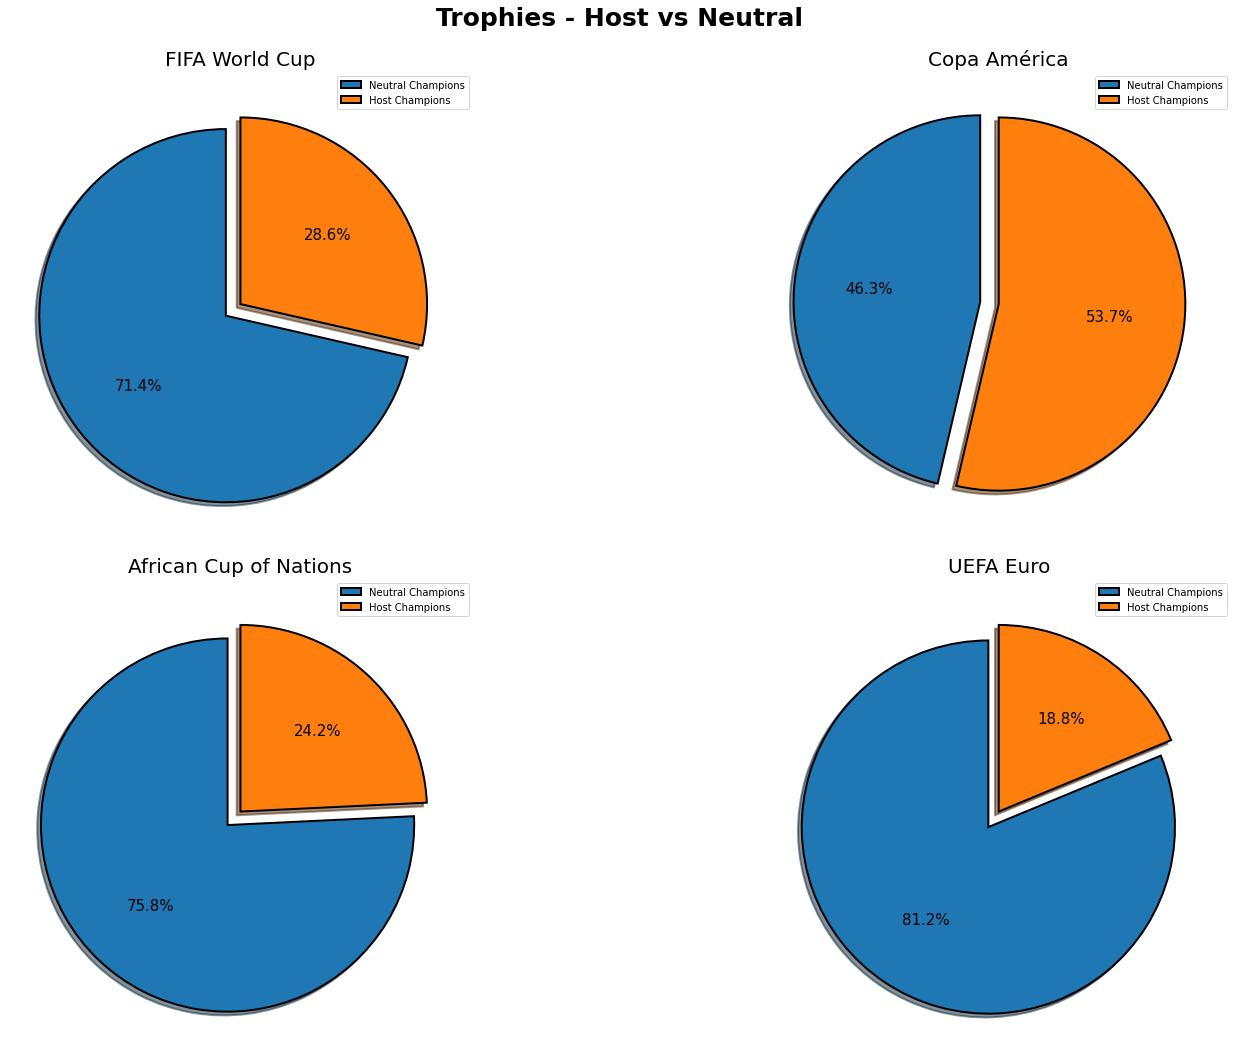

In [29]:
fig_hostvsneutral_trophies

Here we can see that **FIFA World Cup**, **African Cup of Nations** and **UEFA Euro** have a decent (but not so encouraging) win percentage whilst being the Home Team whereas in **Copa América** the Home Team seems to have a higher success rate.

## _Conclusion_

We can conculde by saying that although being the Host Nation may hold an advantage, it doesn't necessarily guarantee 100% success. There is a lot of other data that can contribute to a team's result such as tactics, formation, team chemistry, etc.

For our next project we will be analysing _formations_ as they play a major role in setting up a team's tactics. We will be analysing how formations have evolved over the years and how they impact a team's performance. Additionally, we will also be creating an ML model to predict the outcome of games and tournaments.

For now, let us take a glimpe into what we will be dealing with next.

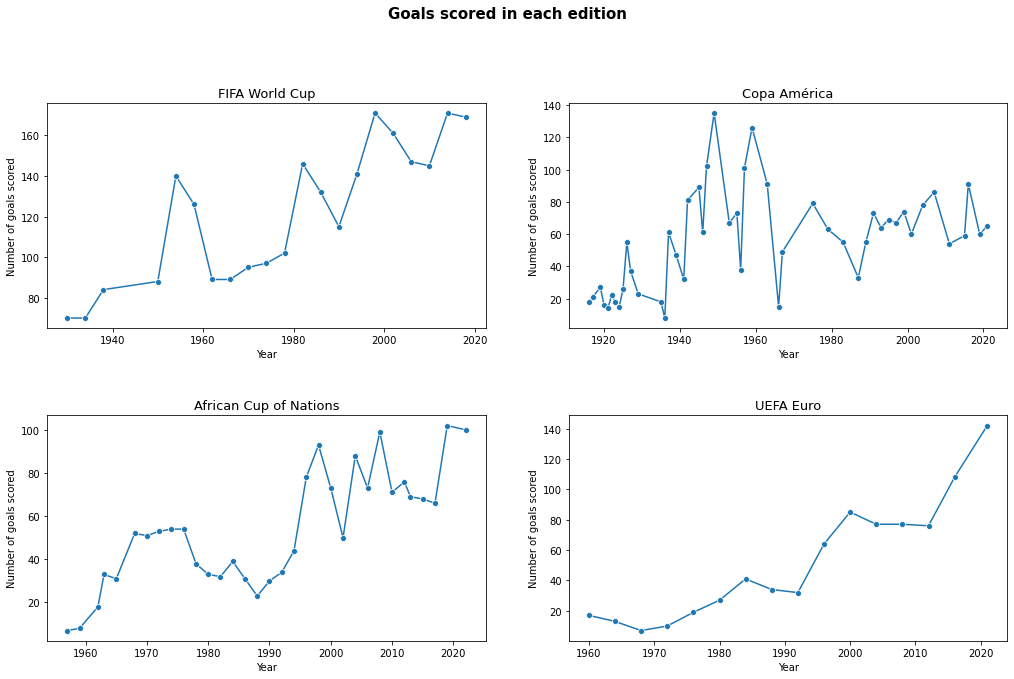

In [30]:
fig_goals

In the above graphs we can see how the number of goals scored is fluctuating over certain periods. This is partly due to the evolution of the sport and a variety in the style of play a.k.a formations. We will dive deeper into this realm in our next project.